## 4.2　ビニング、離散化、線形モデル、決定木

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

print(X.shape)
print(y.shape)

(100, 1)
(100,)


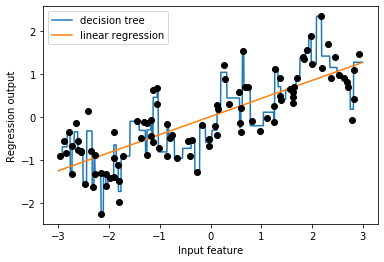

In [12]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

上記は、waveデータセットに対する線形回帰モデルと決定木回帰モデルの比較をしている。

また、線形モデルを連続データに対してより強力にする方法として、ビニングと離散化がある。

In [13]:
bins = np.linspace(-3, 3, 11)

print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


10個のビンに分割する場合、上記の数値を境界線とすると、ちょうど10個のスペースに分けられる。

In [14]:
which_bin = np.digitize(X, bins=bins)

print('\nData points:\n', X[:5])
print('\nBin membership for data points:\n', which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


それぞれのデータポイントが、何番目の領域に入るのかが確認できた。

In [15]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)

print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
pd.DataFrame(X_binned[:5].astype(int), index=np.arange(1, 6), columns=np.arange(1, 11))

,1,2,3,4,5,6,7,8,9,10
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0


インデックスはデータポイント、列は何番目の領域に入るのかを表す。

In [17]:
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (100, 10)


線形回帰モデルと決定木回帰モデルを、ワンホットエンコーディングしたデータでモデリングする。

Text(0.5, 0, 'Input feature')

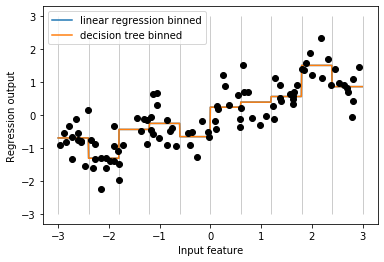

In [20]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')

ビニングは1つの特徴量ごとにしか行えないため、決定木にとってあまりメリットがないが<br>
線形回帰はそれぞれのビンによって異なる値を取ることができるようになったため、表現力が増大している。